In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('archive (1)/UberDataset.csv')

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


array([[<Axes: title={'center': 'MILES'}>]], dtype=object)

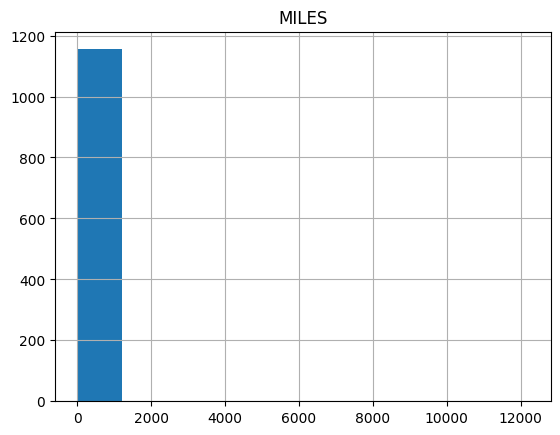

In [4]:
df.hist()

## Dataset Cleaning and setup

In [7]:
df = df.drop(columns=['START_DATE','END_DATE','START','STOP','PURPOSE'])

In [8]:
df.head()

,CATEGORY,MILES
0,Business,5.1
1,Business,5.0
2,Business,4.8
3,Business,4.7
4,Business,63.7


In [9]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CATEGORY  1155 non-null   object 
 1   MILES     1156 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.2+ KB


In [11]:
df.isnull()

,CATEGORY,MILES
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1151,False,False
1152,False,False
1153,False,False
1154,False,False


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LabelHot = LabelEncoder()

In [15]:
df['CATEGORY'] = LabelHot.fit_transform(df['CATEGORY'])

In [16]:
mapping = dict(zip(LabelHot.classes_, LabelHot.transform(LabelHot.classes_)))
print(mapping)

{'Business': np.int64(0), 'Personal': np.int64(1), nan: np.int64(2)}


In [17]:
df.head()

,CATEGORY,MILES
0,0,5.1
1,0,5.0
2,0,4.8
3,0,4.7
4,0,63.7


In [18]:
df.corr()

,CATEGORY,MILES
CATEGORY,1.000000,0.220952
MILES,0.220952,1.000000


array([[<Axes: title={'center': 'CATEGORY'}>,
        <Axes: title={'center': 'MILES'}>]], dtype=object)

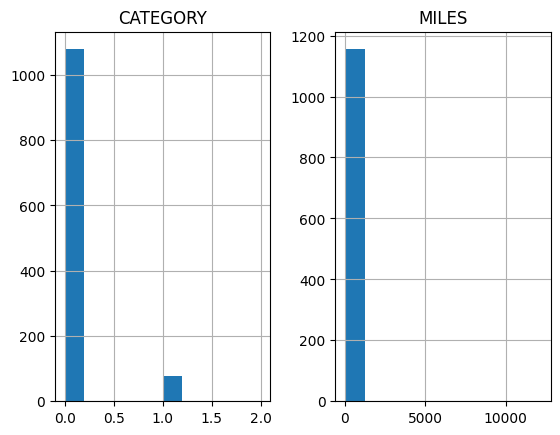

In [19]:
df.hist()

In [20]:
import pandas as pd

def calculate_price(df,miles_column):
    df.loc[df['CATEGORY'] == 0, 'Price INR'] = df['MILES'] * 47 * 90
    
    df.loc[df['CATEGORY'] != 0, 'Price INR'] = df['MILES'] * 56 * 90
    
    return df['Price INR']

In [22]:
df['Price INR'] = calculate_price(df, df['MILES'])

In [23]:
df.head()

,CATEGORY,MILES,Price INR
0,0,5.1,21573.0
1,0,5.0,21150.0
2,0,4.8,20304.0
3,0,4.7,19881.0
4,0,63.7,269451.0


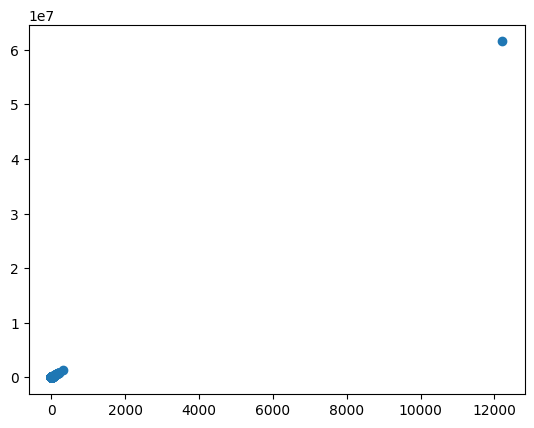

In [24]:
plt.scatter(df['MILES'],df['Price INR'])

In [25]:
import seaborn as sns

<Axes: xlabel='Price INR', ylabel='MILES'>

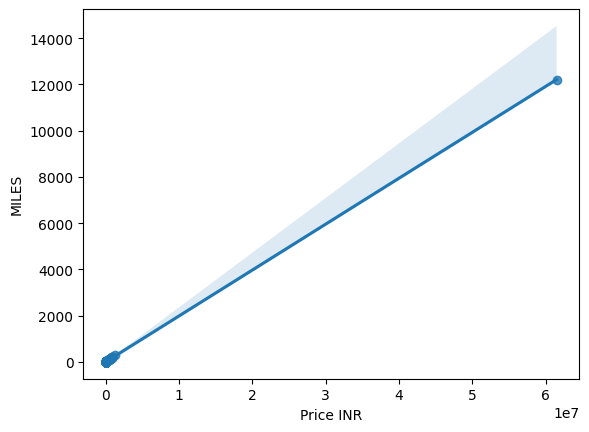

In [26]:
sns.regplot(x='Price INR',y='MILES',data=df)